In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

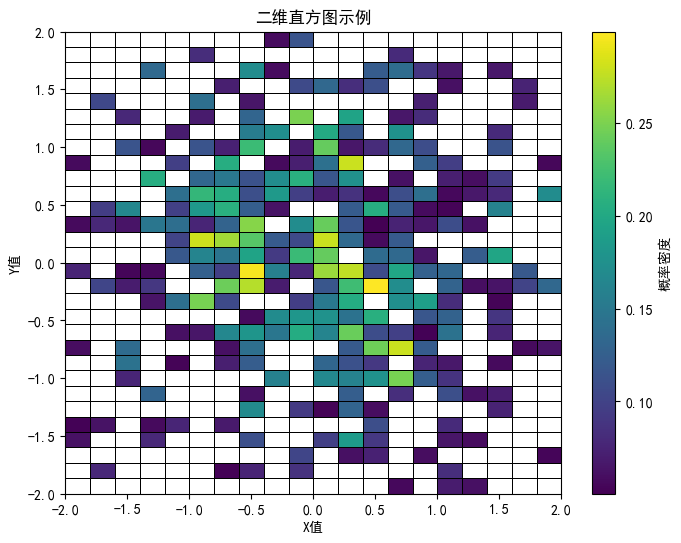

In [3]:
# 生成示例数据
np.random.seed(42)
x = np.random.randn(1000)
y = np.random.randn(1000)
# 为每个数据点分配权重
weights = np.random.rand(1000)

plt.figure(figsize=(8, 6))

# 绘制二维直方图
counts, xedges, yedges, im = plt.hist2d(
    x,                         # x轴数据
    y,                         # y轴数据
    bins=[20, 30],             # 单元格数量：x轴20个，y轴30个
    range=[[-2, 2], [-2, 2]],  # 数据范围：x轴限制在-2到2，y轴限制在-2到2
    density=True,              # 统计值为概率密度（而非样本数量）
    weights=weights,           # 应用权重，统计时会按权重计算
    cmin=0.05,                 # 概率密度小于0.05的单元格不显示颜色
    cmax=0.3,                  # 概率密度大于0.3的单元格统一显示最大密度颜色
    cmap='viridis',            # 使用viridis颜色映射方案
    edgecolor='k',             # 单元格边界颜色
    linewidth=0.5              # 单元格边界线宽
)

# 添加颜色条，关联图像对象im
plt.colorbar(im, label='概率密度')
plt.xlabel('X值')
plt.ylabel('Y值')
plt.title('二维直方图示例')
plt.show()

# 2、使用示例：

### 示例 1：与hexbin()对比

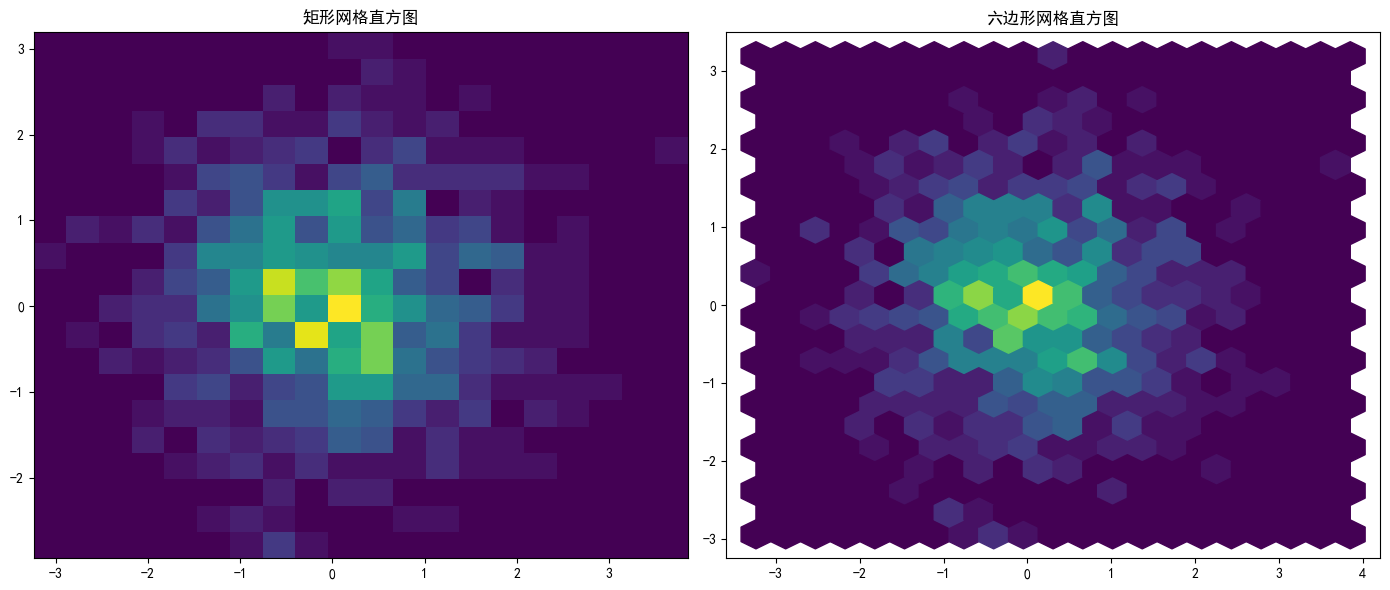

In [4]:
# 生成示例数据
np.random.seed(42)
x = np.random.randn(1000)
y = np.random.randn(1000)

# 对比hexbin和hist2d
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist2d(x, y, bins=20, cmap='viridis')
ax1.set_title('矩形网格直方图')

ax2.hexbin(x, y, gridsize=20, cmap='viridis')
ax2.set_title('六边形网格直方图')

plt.tight_layout()
plt.show()

### 示例 2：获取统计结果

总数据点数: 1000.0
最密集区域的点数: 11.0
x方向分组边界: [-3.24126734 -3.00480071 -2.76833408 -2.53186746 -2.29540083 -2.0589342
 -1.82246757 -1.58600095 -1.34953432 -1.11306769 -0.87660106 -0.64013444
 -0.40366781 -0.16720118  0.06926545  0.30573208  0.5421987   0.77866533
  1.01513196  1.25159859  1.48806521  1.72453184  1.96099847  2.1974651
  2.43393172  2.67039835  2.90686498  3.14333161  3.37979824  3.61626486
  3.85273149]
y方向分组边界: [-2.94038863 -2.73593876 -2.53148889 -2.32703901 -2.12258914 -1.91813927
 -1.71368939 -1.50923952 -1.30478965 -1.10033977 -0.8958899  -0.69144003
 -0.48699015 -0.28254028 -0.07809041  0.12635947  0.33080934  0.53525921
  0.73970909  0.94415896  1.14860883  1.35305871  1.55750858  1.76195845
  1.96640833  2.1708582   2.37530807  2.57975795  2.78420782  2.98865769
  3.19310757]


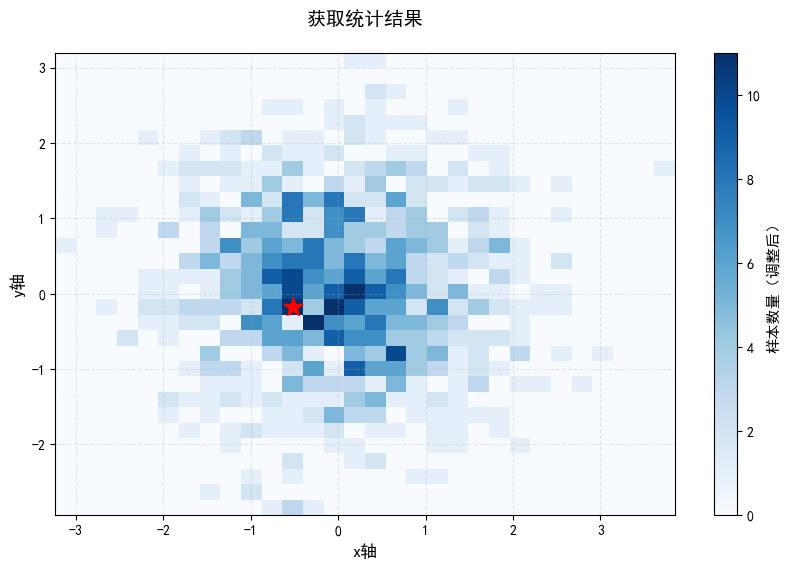

In [5]:
# 生成示例数据
np.random.seed(42)
x = np.random.randn(1000)
y = np.random.randn(1000)

fig, ax = plt.subplots(figsize=(10, 6))

# hist2d返回统计结果，可用于进一步分析
counts, xedges, yedges, im = plt.hist2d(x, y, bins=30)

# 添加颜色条并自定义标签
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('数量', fontsize=11)  # 颜色条标签：概率密度

# -----------------------
# 提取单元格统计数据
# -----------------------
# print(f"每个网格单元格内的统计值: {counts}")
print(f"总数据点数: {np.sum(counts)}")
print(f"最密集区域的点数: {np.max(counts)}")
print(f"x方向分组边界: {xedges}")
print(f"y方向分组边界: {yedges}")

# 标注密度最大的单元格
# 1. 找到counts中最大值的索引：np.argmax(counts)返回一维索引，np.unravel_index转换为二维网格坐标(i,j)
max_idx = np.unravel_index(np.argmax(counts), counts.shape)
# 2. 计算该单元格的中心坐标（用于标注位置）：取左右/上下边界的平均值
max_x = (xedges[max_idx[0]] + xedges[max_idx[0]+1]) / 2  # 最大密度区的x轴中点
max_y = (yedges[max_idx[1]] + yedges[max_idx[1]+1]) / 2  # 最大密度区的y轴中点
# 3. 在中心位置添加红色星形标记
ax.scatter(max_x, max_y,color='red',s=200,marker='*',zorder=100)

# -----------------------
# 通过im修改图表样式
# -----------------------
# 更改颜色映射方案为蓝色系
im.set_cmap('Blues')
# 同步更新颜色条标签
cbar.set_label('样本数量（调整后）', fontsize=11)

ax.set_xlabel('x轴', fontsize=12, fontweight='bold')
ax.set_ylabel('y轴', fontsize=12, fontweight='bold')
ax.set_title('获取统计结果', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
plt.show()

### 示例 3：添加边缘直方图

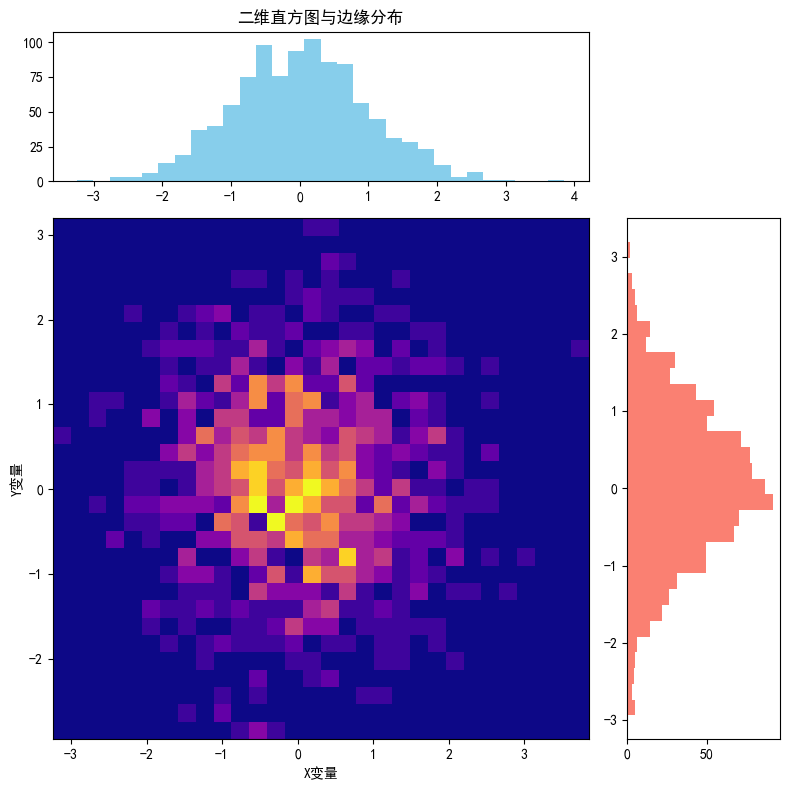

In [6]:
from matplotlib.gridspec import GridSpec

# 生成示例数据
np.random.seed(42)
x = np.random.randn(1000)
y = np.random.randn(1000)

# 设置图形布局
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(4, 4)

ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_x = fig.add_subplot(gs[0, 0:3])
ax_y = fig.add_subplot(gs[1:4, 3])

# 主图：二维直方图
ax_main.hist2d(x, y, bins=30, cmap='plasma')
ax_main.set_xlabel('X变量')
ax_main.set_ylabel('Y变量')

# X轴边缘直方图
ax_x.hist(x, bins=30, color='skyblue')
ax_x.set_title('二维直方图与边缘分布')

# Y轴边缘直方图
ax_y.hist(y, bins=30, orientation='horizontal', color='salmon')

plt.tight_layout()
plt.show()
